In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Regressão

In [2]:
#Base com indicadores sociais e econômicos de municípios brasileiros
df = pd.read_csv('municipios.csv')

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,id_municipio,ano,expectativa_vida,fecundidade_total,mortalidade_1,mortalidade_5,razao_dependencia,prob_sobrevivencia_40,prob_sobrevivencia_60,taxa_envelhecimento,expectativa_anos_estudo,taxa_analfabetismo_11_a_14,taxa_analfabetismo_15_a_17,taxa_analfabetismo_15_mais,taxa_analfabetismo_18_a_24,taxa_analfabetismo_18_mais,taxa_analfabetismo_25_a_29,taxa_analfabetismo_25_mais,taxa_atraso_0_basico,taxa_atraso_0_fundamental,taxa_atraso_0_medio,taxa_atraso_1_basico,taxa_atraso_1_fundamental,taxa_atraso_1_medio,taxa_atraso_2_basico,taxa_atraso_2_fundamental,taxa_atraso_2_medio,taxa_freq_bruta_basico,taxa_freq_bruta_fundamental,taxa_freq_bruta_medio,taxa_freq_bruta_pre,taxa_freq_bruta_superior,taxa_freq_liquida_basico,taxa_freq_liquida_fundamental,taxa_freq_liquida_medio,taxa_freq_liquida_pre,taxa_freq_liquida_superior,taxa_freq_0_3,taxa_freq_11_14,taxa_freq_15_17,taxa_freq_18_24,taxa_freq_25_29,taxa_freq_4_5,taxa_freq_4_6,taxa_freq_5_6,taxa_freq_6,taxa_freq_6_14,taxa_freq_6_17,taxa_freq_fundamental_15_17,taxa_freq_fundamental_18_24,taxa_freq_fundamental_4_5,taxa_freq_medio_18_24,taxa_freq_medio_6_14,taxa_freq_superior_15_17,taxa_fundamental_11_13,taxa_fundamental_12_14,taxa_fundamental_15_17,taxa_fundamental_16_18,taxa_fundamental_18_24,taxa_fundamental_18_mais,taxa_fundamental_25_mais,taxa_medio_18_20,taxa_medio_18_24,taxa_medio_18_mais,taxa_medio_19_21,taxa_medio_25_mais,taxa_superior_25_mais,renda_pc_max_quintil_1,renda_pc_max_quintil_2,renda_pc_max_quintil_3,renda_pc_max_quintil_4,renda_pc_max_decil_9,indice_gini,prop_pobreza_extrema,prop_pobreza_extrema_criancas,prop_pobreza,prop_pobreza_criancas,prop_vulner_pobreza,prop_vulner_pobreza_criancas,prop_renda_10_ricos,prop_renda_20_pobres,prop_renda_20_ricos,prop_renda_40_pobres,prop_renda_60_pobres,prop_renda_80_pobres,prop_renda_trabalho,razao_10_ricos_40_pobres,razao_20_ricos_40_pobres,renda_pc,renda_pc_quintil_1,renda_pc_decil_10,renda_pc_quintil_2,renda_pc_quintil_3,renda_pc_quintil_4,renda_pc_quintil_5,renda_pc_exc_renda_nula,renda_pc_pobreza_extrema,renda_pc_pobreza,renda_pc_vulner_pobreza,indice_theil,prop_trabalhadores_conta_proria,prop_empregadores,prop_ocupados_agropecuaria,prop_ocupados_comercio,prop_ocupados_construcao,prop_ocupados_extracao,prop_ocupados_formalizacao,prop_ocupados_fundamental,prop_ocupados_medio,prop_ocupados_servicos,prop_ocupados_siup,prop_ocupados_superior,prop_ocupados_transformacao,prop_ocupados_renda_0,prop_ocupados_renda_1_sm,prop_ocupados_renda_2_sm,prop_ocupados_renda_3_sm,prop_ocupados_renda_5_sm,renda_media_ocupados,taxa_atividade,taxa_atividade_10_14,taxa_atividade_15_17,taxa_atividade_18_24,taxa_atividade_18_mais,taxa_atividade_25_29,taxa_desocupacao,taxa_desocupacao_10_14,taxa_desocupacao_15_17,taxa_desocupacao_18_24,taxa_desocupacao_18_mais,taxa_desocupacao_25_29,indice_treil_trabalho,taxa_ocupados_carteira,taxa_ocupados_setor_publico,taxa_ocupados_sem_carteira,taxa_agua_encanada,taxa_banheiro_agua_encanada,taxa_densidade_2_mais,taxa_coleta_lixo,taxa_energia_eletrica,taxa_agua_esgoto_inadequados,taxa_paredes_inadequados,taxa_criancas_dom_sem_fund,taxa_criancas_fora_escola_4_5,taxa_criancas_fora_escola_6_14,taxa_dom_sem_fund,taxa_dom_vulner_sem_fund,taxa_sem_fund_informal,taxa_mulheres_com_filho_10_14,taxa_mulheres_com_filho_15_17,taxa_mulheres_chefe_filho_15m,taxa_nest_ntrab_vulner_15_24,taxa_vulner_desloc_1_hora,taxa_dom_vulner_dep_idoso,taxa_sem_energia_eletrica,populacao_homens_0_4,populacao_homens_10_14,populacao_homens_15_19,populacao_homens_20_24,populacao_homens_25_29,populacao_homens_30_34,populacao_homens_35_39,populacao_homens_40_44,populacao_homens_45_49,populacao_homens_50_54,populacao_homens_55_59,populacao_homens_5_9,populacao_homens_60_64,populacao_homens_65_69,populacao_homens_70_74,populacao_homens_75_79,populacao_homens,populacao_homens_80_mais,populacao_mulheres_0_4,populacao_mulheres_10_14,populacao_mulheres_15_19,populacao_mulheres_20_24,populacao_mulheres_25_29,populacao_mulheres_30_34,populacao_mulheres_35_39,popul

In [4]:
#Selecao de alguns indicadores do ano de 2010
df = df[['ano','mortalidade_5','taxa_analfabetismo_25_mais','taxa_freq_liquida_basico',
         'prop_vulner_pobreza','populacao_65_mais']]
df = df.loc[df['ano'] == 2010]
len(df)

5565

In [5]:
df.head()

,ano,mortalidade_5,taxa_analfabetismo_25_mais,taxa_freq_liquida_basico,prop_vulner_pobreza,populacao_65_mais
2,2010,25.49,15.76,85.25,47.12,1425
5,2010,20.53,10.48,85.46,29.04,3943
8,2010,26.58,16.78,88.82,46.98,434
11,2010,15.38,10.95,88.24,29.82,4378
14,2010,19.42,13.51,84.69,34.85,1097


In [6]:
#Verificando a média das variáveis que serão explicativas
print(df['taxa_analfabetismo_25_mais'].mean())
print(df['taxa_freq_liquida_basico'].mean())
print(df['prop_vulner_pobreza'].mean())
print(df['populacao_65_mais'].mean())

20.52186522911054
88.48815274034132
43.99078885893987
2524.5293800539084


<AxesSubplot:xlabel='mortalidade_5'>

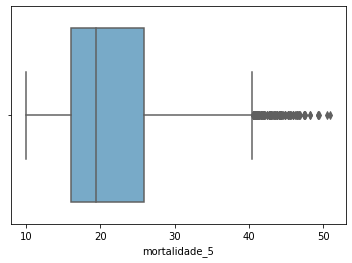

In [7]:
#Boxplot da variáveis dependente
sns.boxplot(x=df["mortalidade_5"], palette="Blues")

In [8]:
#Correlação entre as variáveis
df[['mortalidade_5','taxa_analfabetismo_25_mais','taxa_freq_liquida_basico',
         'prop_vulner_pobreza','populacao_65_mais']].corr('spearman')
#Observa-se que a mortalidade possui correlação alta com taxa de analfabetismo e proporcao vulneravel a pobreza

,mortalidade_5,taxa_analfabetismo_25_mais,taxa_freq_liquida_basico,prop_vulner_pobreza,populacao_65_mais
mortalidade_5,1.000000,0.841041,0.081405,0.846082,-0.067284
taxa_analfabetismo_25_mais,0.841041,1.000000,0.065045,0.892018,-0.130941
taxa_freq_liquida_basico,0.081405,0.065045,1.000000,0.062614,-0.141769
prop_vulner_pobreza,0.846082,0.892018,0.062614,1.000000,-0.067766
populacao_65_mais,-0.067284,-0.130941,-0.141769,-0.067766,1.000000


In [9]:
#Separacao entre variaveis dependentes e independentes
X = df[['taxa_analfabetismo_25_mais','taxa_freq_liquida_basico',
         'prop_vulner_pobreza','populacao_65_mais']]
Y = df[['mortalidade_5']]

In [10]:
#Segmentando os dados em porções de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

In [11]:
#Calculo das médias e desvios-padrão das variáveis para posterior normalizacao
M1 = X_train['taxa_analfabetismo_25_mais'].mean()
M2 = X_train['taxa_freq_liquida_basico'].mean()
M3 = X_train['prop_vulner_pobreza'].mean()
M4 = X_train['populacao_65_mais'].mean()
D1 = np.std(X_train['taxa_analfabetismo_25_mais'])
D2 = np.std(X_train['taxa_freq_liquida_basico'])
D3 = np.std(X_train['prop_vulner_pobreza'])
D4 = np.std(X_train['populacao_65_mais'])

In [12]:
#Normalizaçao das variáveis independentes
X_train['taxa_analfabetismo_25_mais'] = (X_train['taxa_analfabetismo_25_mais'] - M1)/ D1
X_train['taxa_freq_liquida_basico'] = (X_train['taxa_freq_liquida_basico'] - M2)/ D2
X_train['prop_vulner_pobreza'] = (X_train['prop_vulner_pobreza'] - M3)/ D3
X_train['populacao_65_mais'] = (X_train['populacao_65_mais'] - M4)/ D4

In [13]:
#Hiperparametro a ser ajustado é o número de vizinhos
# As métricas de avaliação do modelo a serem calculadas nas iterações são: R2 e erro quadrado médio
parametro = {'n_neighbors':np.arange(1, 300,1)}
scoring = {'R2': 'r2', 'Erro Quadrado médio': 'neg_mean_squared_error'}

In [14]:
#Ajustando o algoritmo do KNN
# Por padrão, utilizará a distância euclidiana
# O parâmetro weights = 'distance' atribui peso maior para observações mais próximas
knn = KNeighborsRegressor(weights = 'distance',algorithm = 'brute')

In [15]:
#Iterando (cross-validation) para obter o melhor hiperparâmetro com base na métrica do erro quadrado médio
KNN = GridSearchCV(knn, parametro, scoring= scoring, refit = 'Erro Quadrado médio', cv=10)

In [16]:
KNN.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='brute', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='distance'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38...
       248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260,
       261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273,
       274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286,
       287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299])},
             pre_dispatch='2*n_jo

In [17]:
# O número de vizinhos que produz o menor erro quadrado médio (15,34) é de 75
print(KNN.best_estimator_.n_neighbors)
print(KNN.best_score_)

75
-15.34635071213656


In [18]:
resultados = KNN.cv_results_
resultados = pd.DataFrame.from_dict(resultados)

In [19]:
pd.set_option('display.max_columns', None)
resultados

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,split4_test_R2,split5_test_R2,split6_test_R2,split7_test_R2,split8_test_R2,split9_test_R2,mean_test_R2,std_test_R2,rank_test_R2,split0_test_Erro Quadrado médio,split1_test_Erro Quadrado médio,split2_test_Erro Quadrado médio,split3_test_Erro Quadrado médio,split4_test_Erro Quadrado médio,split5_test_Erro Quadrado médio,split6_test_Erro Quadrado médio,split7_test_Erro Quadrado médio,split8_test_Erro Quadrado médio,split9_test_Erro Quadrado médio,mean_test_Erro Quadrado médio,std_test_Erro Quadrado médio,rank_test_Erro Quadrado médio
0,0.001795,0.000593,0.021086,0.002262,1,{'n_neighbors': 1},0.453348,0.417316,0.317150,0.410268,0.438089,0.514615,0.492417,0.495502,0.485967,0.344075,0.436875,0.062678,299,-30.270107,-28.111484,-35.707841,-37.065795,-32.622644,-24.822734,-26.587920,-25.717436,-27.120110,-32.894599,-30.092067,4.079180,299
1,0.001698,0.000640,0.023209,0.002362,2,{'n_neighbors': 2},0.589742,0.562784,0.462753,0.571788,0.579217,0.670800,0.633454,0.627807,0.600571,0.497106,0.579602,0.059065,298,-22.717465,-21.093421,-28.093910,-26.913909,-24.429201,-16.835408,-19.200191,-18.973026,-21.073640,-25.220122,-22.455029,3.483550,298
2,0.001499,0.000496,0.022242,0.000458,3,{'n_neighbors': 3},0.613793,0.604801,0.502281,0.617039,0.620152,0.699178,0.658937,0.657493,0.634367,0.581808,0.618985,0.049982,297,-21.385652,-19.066296,-26.026927,-24.069791,-22.052673,-15.384165,-17.865392,-17.459751,-19.290587,-20.972304,-20.357354,3.039397,297
3,0.001695,0.000639,0.028424,0.001428,4,{'n_neighbors': 4},0.625681,0.609507,0.555113,0.651493,0.641908,0.724365,0.681053,0.666977,0.667934,0.604000,0.642803,0.044727,296,-20.727394,-18.839258,-23.264186,-21.904290,-20.789610,-14.096084,-16.706921,-16.976267,-17.519605,-19.859403,-19.068302,2.628996,296
4,0.001599,0.000492,0.028175,0.001497,5,{'n_neighbors': 5},0.637496,0.636180,0.580210,0.659329,0.654227,0.730065,0.696909,0.679169,0.683281,0.610352,0.656722,0.041246,295,-20.073180,-17.552427,-21.951786,-21.411816,-20.074380,-13.804582,-15.876368,-16.354782,-16.709932,-19.540844,-18.335010,2.525724,295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.002161,0.000533,0.049127,0.005499,295,{'n_neighbors': 295},0.677096,0.712059,0.659328,0.693407,0.722545,0.740022,0.730623,0.727901,0.733727,0.697874,0.709458,0.025380,260,-17.880363,-13.891664,-17.814563,-19.269971,-16.108095,-13.295374,-14.110367,-13.870614,-14.048410,-15.151616,-15.544104,1.996194,260
295,0.002151,0.000952,0.048979,0.006305,296,{'n_neighbors': 296},0.676882,0.712061,0.659301,0.693330,0.722483,0.740037,0.730602,0.727858,0.733573,0.697797,0.709392,0.025400,261,-17.892229,-13.891585,-17.815942,-19.274812,-16.111704,-13.294622,-14.111466,-13.872805,-14.056553,-15.155454,-15.547717,1.997891,261
296,0.001995,0.000446,0.044909,0.003057,297,{'n_neighbors': 297},0.676785,0.711904,0.659224,0.693208,0.722316,0.740009,0.730655,0.727750,0.733626,0.697676,0.709315,0.025429,263,-17.897557,-13.899122,-17.819995,-19.282443,-16.121373,-13.296026,-14.108677,-13.878304,-14.053758,-15.161518,-15.551877,1.999723,264
297,0.002493,0.000669,0.051428,0.007165,298,{'n_neighbors': 298},0.676816,0.711861,0.659162,0.693178,0.722163,0.739941,0.730748,0.727726,0.733776,0.697659,0.709303,0.025444,264,-17.895856,-13.901206,-17.823235,-19.284317,-16.130257,-13.299496,-14.103816,-13.879508,-14.045845,-15.162370,-15.552591,2.000760,265


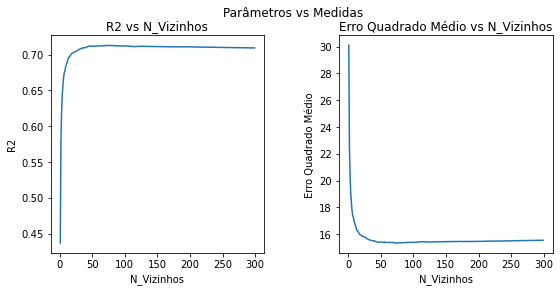

In [20]:
#Grafico de como variam as métricas de avaliação do modelo conforme a quantidade de vizinhos do modelo
fig, axs = plt.subplots(1,2, figsize=(9,4))
axs[0].plot(resultados['param_n_neighbors'], resultados['mean_test_R2'])
axs[0].set(xlabel='N_Vizinhos', ylabel='R2',
       title='R2 vs N_Vizinhos')
axs[1].plot(resultados['param_n_neighbors'], abs(resultados['mean_test_Erro Quadrado médio']))
axs[1].set(xlabel='N_Vizinhos', ylabel='Erro Quadrado Médio',
       title='Erro Quadrado Médio vs N_Vizinhos')
fig.suptitle('Parâmetros vs Medidas') 
plt.subplots_adjust(wspace=0.35,hspace=1)
#Observa-se que próximo a 50 vizinhos as métricas se estabilizam em patamar minimo

In [21]:
#Normalizar as variáveis da base de teste considerando a média e desvio padrão do conjunto de treino
X_test['taxa_analfabetismo_25_mais'] = (X_test['taxa_analfabetismo_25_mais'] - M1)/ D1
X_test['taxa_freq_liquida_basico'] = (X_test['taxa_freq_liquida_basico'] - M2)/ D2
X_test['prop_vulner_pobreza'] = (X_test['prop_vulner_pobreza'] - M3)/ D3
X_test['populacao_65_mais'] = (X_test['populacao_65_mais'] - M4)/ D4

In [22]:
#Calcular a performance do modelo nos dados de teste
previsoes = KNN.predict(X_test)
erro = mean_squared_error(y_test, previsoes)
print("Erro Quadrado Médio:", erro)
r2 = r2_score(y_test, previsoes)
print("R2:", r2)

Erro Quadrado Médio: 15.184738211112592
R2: 0.7171619523725996


# Classificação

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score

In [24]:
df.head()

,ano,mortalidade_5,taxa_analfabetismo_25_mais,taxa_freq_liquida_basico,prop_vulner_pobreza,populacao_65_mais
2,2010,25.49,15.76,85.25,47.12,1425
5,2010,20.53,10.48,85.46,29.04,3943
8,2010,26.58,16.78,88.82,46.98,434
11,2010,15.38,10.95,88.24,29.82,4378
14,2010,19.42,13.51,84.69,34.85,1097


In [25]:
#Categorizando a variável dependente
df['Maior20'] = np.where(df['mortalidade_5'] > 20, 1, 0)

In [26]:
df['Maior20'].value_counts()

0    2945
1    2620
Name: Maior20, dtype: int64

In [27]:
#Retirando variáveis desnecessárias ao modelo e transformando a var. dependente em categoria
df.drop(columns=['ano','mortalidade_5'],inplace = True)
df.Maior20 = df.Maior20.astype('str')

<AxesSubplot:xlabel='Maior20', ylabel='populacao_65_mais'>

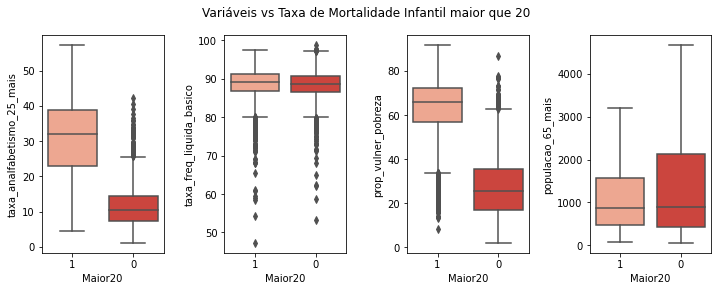

In [31]:
#PLotando o boxplot das variáveis independentes segmentadas pela variável dependente (categórica)
fig, axs = plt.subplots(1,4, figsize=(12,4))
plt.subplots_adjust(wspace=0.5,hspace=5)
fig.suptitle('Variáveis vs Taxa de Mortalidade Infantil maior que 20') 
sns.boxplot(ax = axs[0],x=df["Maior20"], y=df["taxa_analfabetismo_25_mais"], palette="Reds")
sns.boxplot(ax = axs[1],x=df["Maior20"], y=df["taxa_freq_liquida_basico"], palette="Reds")
sns.boxplot(ax = axs[2],x=df["Maior20"], y=df["prop_vulner_pobreza"], palette="Reds")
sns.boxplot(ax = axs[3],x=df["Maior20"], y=df["populacao_65_mais"], palette="Reds", showfliers = False)
# O comportamento das variáveis de taxa de analfabetismo e vulnerabilidade de pobreza é distinta conforme a var. dependente

In [29]:
#Calculando o R2 entre as variaveis independentes (quantitativas) e a variável dependente (qualitativa)
CATVAR = df.select_dtypes(include=['object']).columns.tolist()
NUMVAR = df.select_dtypes(include=['float64','int64']).columns.tolist()
r2 = pd.DataFrame(columns=['VarQuanti','VarQuali','var*n / n_total','R2'])
for z in NUMVAR:
    for x in CATVAR:
        dfr = df[x].value_counts().reset_index()
        f = 0
        a1 = 0
        for y in range(len(dfr)):
            a = dfr.iloc[y,1]
            a1 = a1 + a
            c = (df[df[x] == dfr.iloc[y,0]])
            e = (c[z].var())*a
            f = f + e
        f = f/a1
        r2_calc = 1 - (f/df[z].var())
        r2 = r2.append({'VarQuanti' : z, 'VarQuali' : x,'var*n / n_total' : f, 'R2' : r2_calc}, ignore_index=True)
r2 = r2.sort_values(by = 'R2', ascending = False)
r2
#As variáveis de vulnerabilidade a pobreza e taxa analfabetismo tem um bom R2 com a variavel dependente

,VarQuanti,VarQuali,var*n / n_total,R2
2,prop_vulner_pobreza,Maior20,1.923560e+02,0.617934
0,taxa_analfabetismo_25_mais,Maior20,6.988561e+01,0.571177
3,populacao_65_mais,Maior20,2.806437e+08,0.004506
1,taxa_freq_liquida_basico,Maior20,1.634031e+01,0.000003


In [32]:
X = df[['taxa_analfabetismo_25_mais','taxa_freq_liquida_basico',
         'prop_vulner_pobreza','populacao_65_mais']]
Y = df[['Maior20']]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

In [34]:
M1 = X_train['taxa_analfabetismo_25_mais'].mean()
M2 = X_train['taxa_freq_liquida_basico'].mean()
M3 = X_train['prop_vulner_pobreza'].mean()
M4 = X_train['populacao_65_mais'].mean()
D1 = np.std(X_train['taxa_analfabetismo_25_mais'])
D2 = np.std(X_train['taxa_freq_liquida_basico'])
D3 = np.std(X_train['prop_vulner_pobreza'])
D4 = np.std(X_train['populacao_65_mais'])

In [35]:
#Normalizaçao das variáveis independentes
X_train['taxa_analfabetismo_25_mais'] = (X_train['taxa_analfabetismo_25_mais'] - M1)/ D1
X_train['taxa_freq_liquida_basico'] = (X_train['taxa_freq_liquida_basico'] - M2)/ D2
X_train['prop_vulner_pobreza'] = (X_train['prop_vulner_pobreza'] - M3)/ D3
X_train['populacao_65_mais'] = (X_train['populacao_65_mais'] - M4)/ D4

In [36]:
#Hiperparametro a ser ajustado é o número de vizinhos
# As métricas de avaliação do modelo a serem calculadas nas iterações são: f1_score e ROC AUC Score
parametro = {'n_neighbors':np.arange(1, 300,1)}
scoring = {'AUC': 'roc_auc', 'f1': 'f1'}

In [37]:
knn = KNeighborsClassifier(weights = 'distance',algorithm = 'brute')

In [38]:
#Iterando (cross-validation) para obter o melhor hiperparâmetro com base na métrica do ROC AUC Score
KNN = GridSearchCV(knn, parametro, scoring= scoring, refit = 'AUC', cv=10)

In [39]:
y_train.Maior20 = y_train.Maior20.astype('int64')
y_test.Maior20 = y_test.Maior20.astype('int64')

In [40]:
KNN.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='brute', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='distance'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  3...
       235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247,
       248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260,
       261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273,
       274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286,
       287, 288, 289, 290, 291, 

In [41]:
# O número de vizinhos que resulta no maior ROC AUC Score (0,952) é de 110
print(KNN.best_estimator_.n_neighbors)
print(KNN.best_score_)

110
0.9523290675287504


In [42]:
resultados = KNN.cv_results_
resultados = pd.DataFrame.from_dict(resultados)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,split5_test_AUC,split6_test_AUC,split7_test_AUC,split8_test_AUC,split9_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,split5_test_f1,split6_test_f1,split7_test_f1,split8_test_f1,split9_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,0.002393,7.975699e-04,0.042486,0.005646,1,{'n_neighbors': 1},0.820230,0.840518,0.845953,0.856242,0.826931,0.828234,0.856177,0.841477,0.855620,0.816808,0.838819,0.014253,299,0.810811,0.831522,0.837838,0.848649,0.815427,0.821333,0.849462,0.830084,0.847826,0.806540,0.829949,0.015212,298
1,0.001995,4.460619e-04,0.040990,0.001442,2,{'n_neighbors': 2},0.871597,0.881358,0.898164,0.907226,0.877163,0.890774,0.903632,0.889051,0.903393,0.878420,0.890078,0.012010,298,0.810811,0.831522,0.837838,0.848649,0.815427,0.821333,0.849462,0.830084,0.847826,0.806540,0.829949,0.015212,298
2,0.001795,3.991367e-04,0.044314,0.001270,3,{'n_neighbors': 3},0.903665,0.895578,0.901039,0.928688,0.894391,0.920440,0.919499,0.904865,0.919777,0.898887,0.908683,0.011613,297,0.843836,0.839237,0.843575,0.866667,0.830508,0.855586,0.867403,0.849162,0.869081,0.838527,0.850358,0.012969,297
3,0.001895,2.990440e-04,0.054293,0.001348,4,{'n_neighbors': 4},0.919982,0.910907,0.909996,0.944913,0.906052,0.931707,0.926007,0.922296,0.927386,0.908112,0.920736,0.011691,296,0.849315,0.849315,0.843836,0.869806,0.836158,0.848649,0.864266,0.852273,0.868347,0.845938,0.852790,0.010529,296
4,0.001995,5.415829e-07,0.054858,0.003573,5,{'n_neighbors': 5},0.928596,0.921763,0.919111,0.945151,0.912278,0.932768,0.931508,0.928089,0.937301,0.914104,0.927067,0.009826,295,0.857939,0.864266,0.859551,0.867606,0.847458,0.856369,0.862745,0.866856,0.870523,0.856322,0.860963,0.006485,295


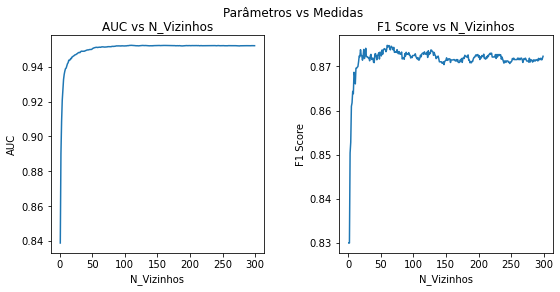

In [43]:
fig, axs = plt.subplots(1,2, figsize=(9,4))
axs[0].plot(resultados['param_n_neighbors'], resultados['mean_test_AUC'])
axs[0].set(xlabel='N_Vizinhos', ylabel='AUC',
       title='AUC vs N_Vizinhos')
axs[1].plot(resultados['param_n_neighbors'], abs(resultados['mean_test_f1']))
axs[1].set(xlabel='N_Vizinhos', ylabel='F1 Score',
       title='F1 Score vs N_Vizinhos')
fig.suptitle('Parâmetros vs Medidas') 
plt.subplots_adjust(wspace=0.35,hspace=1)

In [44]:
#Normalizar as variáveis da base de teste considerando a média e desvio padrão do conjunto de treino
X_test['taxa_analfabetismo_25_mais'] = (X_test['taxa_analfabetismo_25_mais'] - M1)/ D1
X_test['taxa_freq_liquida_basico'] = (X_test['taxa_freq_liquida_basico'] - M2)/ D2
X_test['prop_vulner_pobreza'] = (X_test['prop_vulner_pobreza'] - M3)/ D3
X_test['populacao_65_mais'] = (X_test['populacao_65_mais'] - M4)/ D4

In [45]:
# Calculo do f1_score nos dados de teste
f1_score(y_test, KNN.predict(X_test))

0.8720696584058941

In [46]:
y_score = KNN.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_score)

In [47]:
# Calculo do ROC AUC Score nos dados de teste
print('ROC_AUC_SCORE: ', roc_auc_score(y_test, y_score))

ROC_AUC_SCORE:  0.9525900316911551


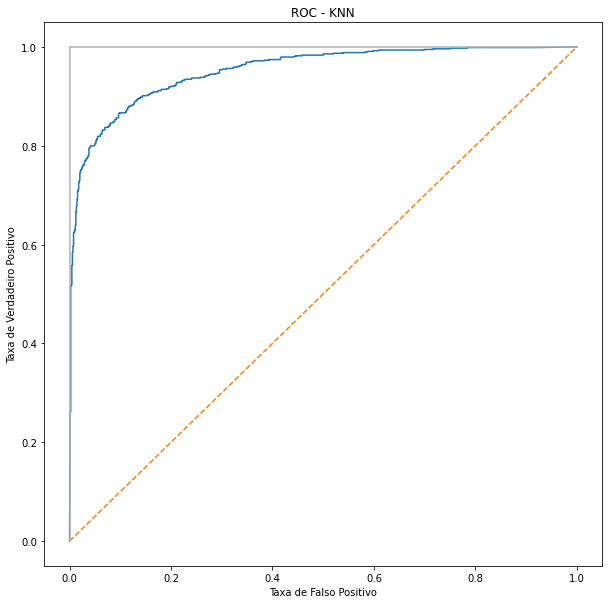

In [48]:
# Desenho da curva ROC
plt.subplots(1, figsize=(10,10))
plt.title('ROC - KNN')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.xlabel('Taxa de Falso Positivo')
plt.show()

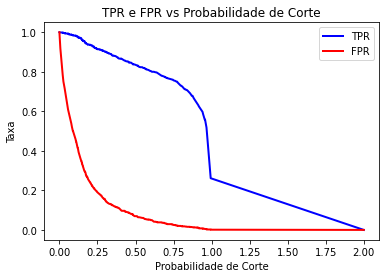

In [49]:
# Taxa de verdadeiros positivos e falsos positivos pela probabilidade de corte na classificação da observação
fig, ax = plt.subplots(1,1)
plt.title('TPR e FPR vs Probabilidade de Corte')
plt.ylabel('Taxa')
plt.xlabel('Probabilidade de Corte')
plt.plot(threshold, tpr, color='blue', linewidth=2, label = 'TPR')
plt.plot(threshold, fpr, color='red', linewidth=2, label = 'FPR')
plt.legend()